# `neural_network_without_race_without_weather_pairwise_winners.ipynb`

### Author: Anthony Hein

#### Last updated: 11/14/2021

# Overview:

Modify the datasets
* `X_train_preprocess_without_race.csv`
* `X_dev_preprocess_without_race.csv`
* `X_test_preprocess_without_race.csv`

such that all features which involve weather are removed. Then use these modified datasets and the targets in
* `X_train_pairwise_winner_labels.csv`
* `X_dev_pairwise_winner_labels.csv`
* `X_test_pairwise_winner_labels.csv`

to make a neural network model that tries to predict the pairwise winner between each pair of runners.

---

## Setup

In [1]:
from datetime import datetime
import git
import os
import re
from typing import List
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Remove Features that Involve Weather

In [3]:
drop_cols = [
    'horse1_jockey_prev_1_position_temp',
    'horse1_jockey_prev_2_position_temp',
    'horse1_jockey_prev_3_position_temp',
    'horse1_jockey_prev_1_finishing_time_ratio_temp',
    'horse1_jockey_prev_2_finishing_time_ratio_temp',
    'horse1_jockey_prev_3_finishing_time_ratio_temp',
    'horse1_jockey_prev_1_position_msl',
    'horse1_jockey_prev_2_position_msl',
    'horse1_jockey_prev_3_position_msl',
    'horse1_jockey_prev_1_finishing_time_ratio_msl',
    'horse1_jockey_prev_2_finishing_time_ratio_msl',
    'horse1_jockey_prev_3_finishing_time_ratio_msl',
    'horse1_jockey_prev_1_position_rain',
    'horse1_jockey_prev_2_position_rain',
    'horse1_jockey_prev_3_position_rain',
    'horse1_jockey_prev_1_finishing_time_ratio_rain',
    'horse1_jockey_prev_2_finishing_time_ratio_rain',
    'horse1_jockey_prev_3_finishing_time_ratio_rain',
    'horse1_jockey_prev_1_position_rhum',
    'horse1_jockey_prev_2_position_rhum',
    'horse1_jockey_prev_3_position_rhum',
    'horse1_jockey_prev_1_finishing_time_ratio_rhum',
    'horse1_jockey_prev_2_finishing_time_ratio_rhum',
    'horse1_jockey_prev_3_finishing_time_ratio_rhum',
    'horse2_jockey_prev_1_position_temp',
    'horse2_jockey_prev_2_position_temp',
    'horse2_jockey_prev_3_position_temp',
    'horse2_jockey_prev_1_finishing_time_ratio_temp',
    'horse2_jockey_prev_2_finishing_time_ratio_temp',
    'horse2_jockey_prev_3_finishing_time_ratio_temp',
    'horse2_jockey_prev_1_position_msl',
    'horse2_jockey_prev_2_position_msl',
    'horse2_jockey_prev_3_position_msl',
    'horse2_jockey_prev_1_finishing_time_ratio_msl',
    'horse2_jockey_prev_2_finishing_time_ratio_msl',
    'horse2_jockey_prev_3_finishing_time_ratio_msl',
    'horse2_jockey_prev_1_position_rain',
    'horse2_jockey_prev_2_position_rain',
    'horse2_jockey_prev_3_position_rain',
    'horse2_jockey_prev_1_finishing_time_ratio_rain',
    'horse2_jockey_prev_2_finishing_time_ratio_rain',
    'horse2_jockey_prev_3_finishing_time_ratio_rain',
    'horse2_jockey_prev_1_position_rhum',
    'horse2_jockey_prev_2_position_rhum',
    'horse2_jockey_prev_3_position_rhum',
    'horse2_jockey_prev_1_finishing_time_ratio_rhum',
    'horse2_jockey_prev_2_finishing_time_ratio_rhum',
    'horse2_jockey_prev_3_finishing_time_ratio_rhum'
]

---

## Load `X_train_preprocess_without_race.csv`

In [5]:
X_train = pd.read_csv(f"{BASE_DIR}/data/analysis/X_train_preprocess_without_race.csv", low_memory=False)
X_train.head()

,horse1_age,horse1_saddle,horse1_decimalPrice,horse1_isFav,horse1_outHandicap,horse1_RPR,horse1_weight,horse1_jockey_d_last_race,horse1_jockey_d_first_race,horse1_jockey_prev_1_position,...,horse2_jockey_prev_3_position_rain,horse2_jockey_prev_1_finishing_time_ratio_rain,horse2_jockey_prev_2_finishing_time_ratio_rain,horse2_jockey_prev_3_finishing_time_ratio_rain,horse2_jockey_prev_1_position_rhum,horse2_jockey_prev_2_position_rhum,horse2_jockey_prev_3_position_rhum,horse2_jockey_prev_1_finishing_time_ratio_rhum,horse2_jockey_prev_2_finishing_time_ratio_rhum,horse2_jockey_prev_3_finishing_time_ratio_rhum
0,0.200000,0.230769,0.196970,0.0,0.0,0.73125,0.692308,0.007631,0.236544,0.100,...,0.050,0.805104,0.780139,0.783438,0.100,0.025,0.025,0.805104,0.799642,0.780139
1,0.400000,0.038462,0.072222,0.0,0.0,0.73125,0.743590,0.005050,0.236544,0.100,...,0.100,0.801416,0.781238,0.794160,0.075,0.050,0.075,0.801416,0.800487,0.785703
2,0.133333,0.423077,0.098485,0.0,0.0,0.65000,0.705128,0.000740,0.237283,0.025,...,0.100,0.799909,0.780139,0.786816,0.025,0.100,0.025,0.799642,0.806486,0.780139
3,0.133333,0.423077,0.098485,0.0,0.0,0.65000,0.705128,0.000740,0.237283,0.025,...,0.075,0.800176,0.781623,0.781870,0.050,0.075,0.050,0.801163,0.801416,0.780963
4,0.133333,0.192308,0.090278,0.0,0.0,0.66250,0.730769,0.000740,0.234655,0.050,...,0.100,0.799642,0.783601,0.785468,0.125,0.100,0.025,0.803191,0.805104,0.780139


In [6]:
X_train.shape

(800666, 144)

In [7]:
X_train = X_train.drop(columns=drop_cols)
X_train.shape

(800666, 96)

---

## Load `X_dev_preprocess_without_race.csv`

In [8]:
X_dev = pd.read_csv(f"{BASE_DIR}/data/analysis/X_dev_preprocess_without_race.csv", low_memory=False)
X_dev.head()

,horse1_age,horse1_saddle,horse1_decimalPrice,horse1_isFav,horse1_outHandicap,horse1_RPR,horse1_weight,horse1_jockey_d_last_race,horse1_jockey_d_first_race,horse1_jockey_prev_1_position,...,horse2_jockey_prev_3_position_rain,horse2_jockey_prev_1_finishing_time_ratio_rain,horse2_jockey_prev_2_finishing_time_ratio_rain,horse2_jockey_prev_3_finishing_time_ratio_rain,horse2_jockey_prev_1_position_rhum,horse2_jockey_prev_2_position_rhum,horse2_jockey_prev_3_position_rhum,horse2_jockey_prev_1_finishing_time_ratio_rhum,horse2_jockey_prev_2_finishing_time_ratio_rhum,horse2_jockey_prev_3_finishing_time_ratio_rhum
0,0.285714,0.105263,0.200000,0.0,0.0,0.608392,0.769231,0.001516,0.629407,0.250,...,0.200,0.828972,0.837641,0.843255,0.075,0.050,0.275,0.834583,0.828972,0.853796
1,0.285714,0.210526,0.157143,0.0,0.0,0.258741,0.769231,0.000445,0.286087,0.075,...,0.075,0.826039,0.826039,0.842799,0.025,0.025,0.075,0.826039,0.826039,0.842799
2,0.285714,0.210526,0.157143,0.0,0.0,0.258741,0.769231,0.000445,0.286087,0.075,...,0.125,0.826413,0.841758,0.844367,0.125,0.050,0.275,0.843955,0.826413,0.841758
3,0.285714,0.210526,0.157143,0.0,0.0,0.258741,0.769231,0.000445,0.286087,0.075,...,0.050,0.832401,0.832114,0.828366,0.100,0.075,0.050,0.832401,0.837064,0.828519
4,0.285714,0.210526,0.157143,0.0,0.0,0.258741,0.769231,0.000445,0.286087,0.075,...,0.175,0.857255,0.835266,0.834946,0.150,0.025,0.200,0.857255,0.826039,0.837392


In [9]:
X_dev.shape

(228766, 144)

In [10]:
X_dev = X_dev.drop(columns=drop_cols)
X_dev.shape

(228766, 96)

---

## Load `X_test_preprocess_without_race.csv`

In [11]:
X_test = pd.read_csv(f"{BASE_DIR}/data/analysis/X_test_preprocess_without_race.csv", low_memory=False)
X_test.head()

,horse1_age,horse1_saddle,horse1_decimalPrice,horse1_isFav,horse1_outHandicap,horse1_RPR,horse1_weight,horse1_jockey_d_last_race,horse1_jockey_d_first_race,horse1_jockey_prev_1_position,...,horse2_jockey_prev_3_position_rain,horse2_jockey_prev_1_finishing_time_ratio_rain,horse2_jockey_prev_2_finishing_time_ratio_rain,horse2_jockey_prev_3_finishing_time_ratio_rain,horse2_jockey_prev_1_position_rhum,horse2_jockey_prev_2_position_rhum,horse2_jockey_prev_3_position_rhum,horse2_jockey_prev_1_finishing_time_ratio_rhum,horse2_jockey_prev_2_finishing_time_ratio_rhum,horse2_jockey_prev_3_finishing_time_ratio_rhum
0,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.200,0.865544,0.847264,0.853154,0.025,0.200,0.300,0.840533,0.850856,0.864844
1,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.150,0.864781,0.840533,0.855519,0.025,0.025,0.025,0.840533,0.840533,0.840533
2,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.075,0.838534,0.843337,0.846422,0.200,0.100,0.125,0.853412,0.842583,0.847859
3,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.250,0.851685,0.849673,0.854624,0.150,0.250,0.200,0.849673,0.854624,0.858051
4,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.250,0.847892,0.842776,0.862423,0.175,0.075,0.275,0.853634,0.844529,0.862845


In [12]:
X_test.shape

(114392, 144)

In [13]:
X_test = X_test.drop(columns=drop_cols)
X_test.shape

(114392, 96)

---

## Load Pairwise Winner Labels

In [14]:
X_train_pairwise_winner_labels = np.loadtxt(f"{BASE_DIR}/data/analysis/x_train_pairwise_winner_labels.csv",
                                            dtype=int,
                                            delimiter=',')

In [15]:
X_dev_pairwise_winner_labels = np.loadtxt(f"{BASE_DIR}/data/analysis/X_dev_pairwise_winner_labels.csv",
                                          dtype=int,
                                          delimiter=',')

In [16]:
X_test_pairwise_winner_labels = np.loadtxt(f"{BASE_DIR}/data/analysis/X_test_pairwise_winner_labels.csv",
                                           dtype=int,
                                           delimiter=',')

## Neural Network Architecture

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Set the device to use
# CUDA refers to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Fixing Random Seed for Reproducibility
torch.manual_seed(0)
np.random.seed(0)

In [18]:
X_train_tensor = torch.from_numpy(X_train.to_numpy()).float().to(device)

y_train_tensor = torch.from_numpy(X_train_pairwise_winner_labels).float().to(device)
y_train_tensor = torch.reshape(y_train_tensor, (-1, 1))

X_dev_tensor = torch.from_numpy(X_dev.to_numpy()).float().to(device)

y_dev_tensor = torch.from_numpy(X_dev_pairwise_winner_labels).float().to(device)
y_dev_tensor = torch.reshape(y_dev_tensor, (-1, 1))

In [19]:
X_train_dataset = list(zip(X_train_tensor, y_train_tensor))
X_dev_dataset = list(zip(X_dev_tensor, y_dev_tensor))

In [20]:
class Net(nn.Module):
    def __init__(self, input_size, num_layers, layers_size):
        super(Net, self).__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, layers_size)])
        self.hidden_layers.extend([nn.Linear(layers_size, layers_size) for i in range(1, num_layers-1)])
        self.output = nn.Linear(layers_size, 1)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        z = x
        for layer in self.hidden_layers:
            z = self.activation(layer(z))
        return self.output(z)

In [21]:
class Trainer():
    def __init__(self, net, optim, loss_function, train_loader):
        self.net = net
        self.optim = optim
        self.loss_function = loss_function
        self.train_loader = train_loader

    def train(self, epochs, verbose=True):
        losses = []
        for epoch in range(epochs):
            epoch_loss = 0.0
            epoch_steps = 0
            for data in self.train_loader:
                
                X = data[0].to(device)
                y = data[1].to(device)
                
                self.optim.zero_grad()

                preds = self.net.forward(X)

                loss = self.loss_function(preds, y)

                loss.backward()

                self.optim.step()

                epoch_loss += loss.item()
                epoch_steps += 1

            losses.append(epoch_loss / epoch_steps)
            if verbose: print("epoch [%d]: loss %.3f" % (epoch+1, losses[-1]))
        return losses

In [22]:
## Hyperparameters

num_epochs = 10
batch_size = 256
learning_rate = 0.02

In [23]:
train_loader = DataLoader(dataset=X_train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
dev_loader = DataLoader(dataset=X_dev_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [24]:
net = Net(X_train_tensor.shape[1], 1, 750)
net = net.to(device)
opt = optim.Adam(net.parameters(), lr=learning_rate)
loss_function = nn.BCEWithLogitsLoss()

trainer = Trainer(net=net, optim=opt, loss_function=loss_function, train_loader=train_loader)

losses = trainer.train(num_epochs)

epoch [1]: loss 0.218
epoch [2]: loss 0.176
epoch [3]: loss 0.164
epoch [4]: loss 0.156
epoch [5]: loss 0.151
epoch [6]: loss 0.146
epoch [7]: loss 0.145
epoch [8]: loss 0.140
epoch [9]: loss 0.139
epoch [10]: loss 0.137


Good hyperparameters:

* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [150]) 90.56, 89.08
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [300]) 92.90, 91.98
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [450]) 93.28, 92.36
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [600]) 94.00, 93.19 _same number parameters as best NN w/weather + other_
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [800]) 93.39, 91.35
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [700]) 93.29, 93.16
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [650]) 93.24, 93.14
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [625]) 93.79, 93.45
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [675]) 93.89 93.45
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [750]) 93.86 93.61
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [725]) 93.95 93.71
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [775]) 93.97 93.28
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [500]) 93.81 93.48
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [900]) 93.96 93.20
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [700]) 93.43 93.08
* num_epochs = 15, batch_size = 256, learning_rate = 0.02, Net(X_train_tensor.shape[1], 1, [750]) 94.07 93.29

In [25]:
err = 0
tot = 0
with torch.no_grad():
    for data in train_loader:
        
        X = data[0].to(device)
        y = data[1].to(device)

        # raw output of network for X
        preds = torch.round(torch.sigmoid(net(X)))

        tot += y.size(0)

        err += torch.sum(y != preds)

acc_percent = 100 - (100 * err / tot)
print('Accuracy of NN prediction on training set: %5.2f%%' % acc_percent)

Accuracy of NN prediction on training set: 91.28%


In [26]:
err = 0
tot = 0
with torch.no_grad():
    for data in dev_loader:
        
        X = data[0].to(device)
        y = data[1].to(device)

        # raw output of network for X
        preds = torch.round(torch.sigmoid(net(X)))

        tot += y.size(0)

        err += torch.sum(y != preds)

acc_percent = 100 - (100 * err / tot)
print('Accuracy of NN prediction on dev set: %5.2f%%' % acc_percent)

Accuracy of NN prediction on dev set: 91.06%


Text(0, 0.5, 'loss')

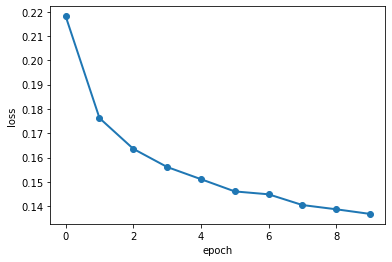

In [27]:
plt.plot(losses, linewidth=2, linestyle='-', marker='o')
plt.xlabel("epoch")
plt.ylabel("loss")

In [28]:
def accuracy(net, data_loader):
    err = 0
    tot = 0
    with torch.no_grad():
        for data in data_loader:

            X = data[0].to(device)
            y = data[1].to(device)

            # raw output of network for X
            preds = torch.round(torch.sigmoid(net(X)))

            tot += y.size(0)

            err += torch.sum(y != preds)

    acc_percent = 100 - (100 * err / tot)
    return acc_percent

In [29]:
## Fixing Random Seed for Reproducibility
torch.manual_seed(0)
np.random.seed(0)

rows = []

hyperparameter_space = np.arange(100,800,50)

for hidden_size in hyperparameter_space:
    print(hidden_size)
    for _ in range(5):
        net = Net(X_train_tensor.shape[1], 1, hidden_size)
        net = net.to(device)
        opt = optim.Adam(net.parameters(), lr=learning_rate)
        loss_function = nn.BCEWithLogitsLoss()

        trainer = Trainer(net=net, optim=opt, loss_function=loss_function, train_loader=train_loader)
        trainer.train(num_epochs, verbose=False)

        rows.append({
            "hidden_size": hidden_size,
            "train_acc": accuracy(net, train_loader),
            "dev_acc": accuracy(net, dev_loader),
        })

100
150
200
250
300
350
400
450
500
550
600
650
700
750


In [30]:
pd.DataFrame(rows).to_csv(f"{BASE_DIR}/data/analysis/neural_network/without_weather.csv")

In [31]:
df = pd.DataFrame(rows)
df

,hidden_size,train_acc,dev_acc
0,100,tensor(93.6415),tensor(93.1817)
1,100,tensor(94.7867),tensor(94.5800)
2,100,tensor(92.7271),tensor(92.6654)
3,100,tensor(94.9465),tensor(94.7007)
4,100,tensor(95.3792),tensor(95.0814)
...,...,...,...
65,750,tensor(95.1126),tensor(94.8821)
66,750,tensor(95.4351),tensor(95.0889)
67,750,tensor(95.2973),tensor(94.9735)
68,750,tensor(95.0810),tensor(94.7129)


In [32]:
df['train_acc'] = df['train_acc'].map(lambda x: x.item())
df['dev_acc'] = df['dev_acc'].map(lambda x: x.item())
df

,hidden_size,train_acc,dev_acc
0,100,93.641541,93.181679
1,100,94.786713,94.580048
2,100,92.727051,92.665428
3,100,94.946457,94.700699
4,100,95.379219,95.081436
...,...,...,...
65,750,95.112572,94.882111
66,750,95.435051,95.088867
67,750,95.297287,94.973465
68,750,95.080971,94.712936


In [33]:
df_agg = df.groupby('hidden_size').mean().reset_index()
df_agg

,hidden_size,train_acc,dev_acc
0,100,94.296196,94.041858
1,150,93.507506,93.236232
2,200,94.501503,94.172910
3,250,94.287831,93.990016
4,300,94.331870,94.078401
5,350,94.524434,94.212515
6,400,93.169960,92.876825
7,450,94.733186,94.417439
8,500,94.777400,94.469807
9,550,94.673059,94.401268


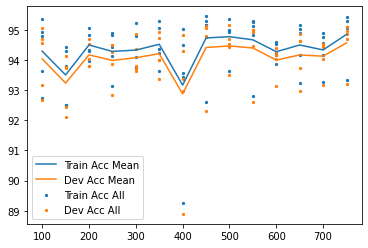

In [34]:
plt.scatter(df['hidden_size'], df['train_acc'], label="Train Acc All", s=5)
plt.scatter(df['hidden_size'], df['dev_acc'], label="Dev Acc All", s=5)
plt.plot(df_agg['hidden_size'], df_agg['train_acc'], label="Train Acc Mean")
plt.plot(df_agg['hidden_size'], df_agg['dev_acc'], label="Dev Acc Mean")
plt.legend()
plt.show()

---

## Select Model and Save

In [40]:
net = Net(X_train_tensor.shape[1], 1, 500)
net = net.to(device)
opt = optim.Adam(net.parameters(), lr=learning_rate)
loss_function = nn.BCEWithLogitsLoss()

trainer = Trainer(net=net, optim=opt, loss_function=loss_function, train_loader=train_loader)

losses = trainer.train(num_epochs)

epoch [1]: loss 0.224
epoch [2]: loss 0.176
epoch [3]: loss 0.162
epoch [4]: loss 0.156
epoch [5]: loss 0.149
epoch [6]: loss 0.143
epoch [7]: loss 0.141
epoch [8]: loss 0.137
epoch [9]: loss 0.135
epoch [10]: loss 0.135


In [41]:
err = 0
tot = 0
with torch.no_grad():
    for data in train_loader:
        
        X = data[0].to(device)
        y = data[1].to(device)

        # raw output of network for X
        preds = torch.round(torch.sigmoid(net(X)))

        tot += y.size(0)

        err += torch.sum(y != preds)

acc_percent = 100 - (100 * err / tot)
print('Accuracy of NN prediction on training set: %5.2f%%' % acc_percent)

Accuracy of NN prediction on training set: 95.28%


In [42]:
err = 0
tot = 0
with torch.no_grad():
    for data in dev_loader:
        
        X = data[0].to(device)
        y = data[1].to(device)

        # raw output of network for X
        preds = torch.round(torch.sigmoid(net(X)))

        tot += y.size(0)

        err += torch.sum(y != preds)

acc_percent = 100 - (100 * err / tot)
print('Accuracy of NN prediction on dev set: %5.2f%%' % acc_percent)

Accuracy of NN prediction on dev set: 95.13%


Text(0, 0.5, 'loss')

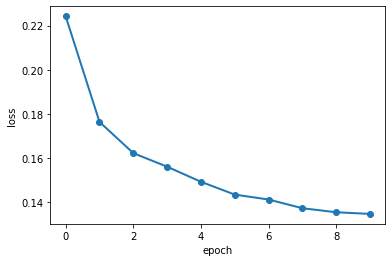

In [43]:
plt.plot(losses, linewidth=2, linestyle='-', marker='o')
plt.xlabel("epoch")
plt.ylabel("loss")

In [44]:
torch.save(net.state_dict(), f"{BASE_DIR}/data/analysis/net_no_weather_500_nodes.bin")

---

## Test Set

In [45]:
X_test_tensor = torch.from_numpy(X_test.to_numpy()).float().to(device)

y_test_tensor = torch.from_numpy(X_test_pairwise_winner_labels).float().to(device)
y_test_tensor = torch.reshape(y_test_tensor, (-1, 1))

In [46]:
X_test_dataset = list(zip(X_test_tensor, y_test_tensor))

In [47]:
test_loader = DataLoader(dataset=X_test_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

In [48]:
accuracy(net, test_loader).item()

94.95244598388672

---